In [ ]:
import requests
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
asd = pd.read_csv("https://data.cdc.gov/api/views/k86t-wghb/rows.csv?accessType=DOWNLOAD", error_bad_lines=False)


This is the complete dataset for the 500 Cities project 2019 release. This dataset includes 2017, 2016 model-based small area estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9). Data were provided by the Centers for Disease Control and Prevention (CDC)

https://chronicdata.cdc.gov/500-Cities/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq


In [ ]:
### EDA
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               27210 non-null  object 
 1   PlaceName               27210 non-null  object 
 2   PlaceFIPS               27210 non-null  int64  
 3   TractFIPS               27210 non-null  int64  
 4   Place_TractID           27210 non-null  object 
 5   Population2010          27210 non-null  int64  
 6   ACCESS2_CrudePrev       27209 non-null  float64
 7   ACCESS2_Crude95CI       27209 non-null  object 
 8   ARTHRITIS_CrudePrev     27210 non-null  float64
 9   ARTHRITIS_Crude95CI     27210 non-null  object 
 10  BINGE_CrudePrev         27210 non-null  float64
 11  BINGE_Crude95CI         27210 non-null  object 
 12  BPHIGH_CrudePrev        27210 non-null  float64
 13  BPHIGH_Crude95CI        27210 non-null  object 
 14  BPMED_CrudePrev         27210 non-null

In [ ]:
# Analysis
asd.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPMED_CrudePrev,BPMED_Crude95CI,CANCER_CrudePrev,CANCER_Crude95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CHD_CrudePrev,CHD_Crude95CI,CHECKUP_CrudePrev,CHECKUP_Crude95CI,CHOLSCREEN_CrudePrev,CHOLSCREEN_Crude95CI,COLON_SCREEN_CrudePrev,COLON_SCREEN_Crude95CI,COPD_CrudePrev,COPD_Crude95CI,COREM_CrudePrev,COREM_Crude95CI,COREW_CrudePrev,COREW_Crude95CI,CSMOKING_CrudePrev,CSMOKING_Crude95CI,DENTAL_CrudePrev,DENTAL_Crude95CI,DIABETES_CrudePrev,DIABETES_Crude95CI,HIGHCHOL_CrudePrev,HIGHCHOL_Crude95CI,KIDNEY_CrudePrev,KIDNEY_Crude95CI,LPA_CrudePrev,LPA_Crude95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,PAPTEST_CrudePrev,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",10.3,"( 9.8, 10.7)",47.7,"(46.6, 48.8)",77.8,"(77.0, 78.6)",5.3,"( 5.0, 5.5)",13.4,"(12.7, 14.3)",7.8,"( 7.3, 8.3)",74.8,"(74.1, 75.5)",78.6,"(77.1, 80.0)",56.8,"(53.5, 59.9)",11.3,"(10.1, 12.5)",29.7,"(25.5, 34.3)",23.2,"(20.4, 26.1)",27.9,"(25.3, 30.6)",42.8,"(39.4, 46.0)",17.4,"(16.6, 18.3)",35.3,"(34.5, 36.2)",4.3,"( 4.0, 4.5)",44.0,"(41.4, 46.5)",82.8,"(80.2, 84.7)",20.5,"(18.9, 22.1)",46.4,"(45.2, 47.5)",85.0,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",10.5,"(10.1, 10.9)",48.2,"(47.1, 49.3)",78.5,"(77.6, 79.3)",4.7,"( 4.6, 4.8)",12.5,"(11.7, 13.3)",8.6,"( 7.9, 9.3)",72.1,"(71.4, 72.8)",76.0,"(74.6, 77.4)",53.8,"(49.7, 57.8)",11.9,"(10.6, 13.2)",26.4,"(22.2, 31.0)",20.9,"(17.7, 25.0)",29.3,"(26.5, 32.0)",39.7,"(36.3, 43.5)",19.8,"(18.6, 20.9)",36.8,"(35.9, 37.7)",4.6,"( 4.3, 4.9)",47.5,"(44.9, 49.9)",83.2,"(80.4, 85.7)",21.2,"(19.6, 22.7)",47.8,"(46.6, 48.9)",83.8,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",10.4,"( 9.9, 11.0)",49.1,"(47.8, 50.4)",79.4,"(78.5, 80.3)",5.3,"( 5.2, 5.5)",13.3,"(12.4, 14.4)",7.5,"( 6.9, 8.2)",76.6,"(75.8, 77.4)",80.2,"(78.5, 82.0)",59.7,"(55.2, 63.9)",10.5,"( 9.2, 12.0)",28.0,"(23.3, 33.4)",23.2,"(19.6, 27.0)",25.9,"(22.8, 29.0)",44.1,"(40.0, 48.0)",18.4,"(17.3, 19.6)",35.6,"(34.5, 36.6)",4.2,"( 4.0, 4.5)",43.0,"(40.0, 45.9)",83.5,"(80.6, 85.9)",18.8,"(17.1, 20.7)",45.7,"(44.3, 46.9)",84.6,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",9.1,"( 8.6, 9.6)",54.1,"(52.7, 55.3)",82.1,"(81.3, 82.9)",6.0,"( 5.8, 6.3)",13.6,"(12.7, 14.7)",9.6,"( 8.7, 10.6)",78.2,"(77.4, 78.9)",80.5,"(78.7, 82.1)",57.9,"(53.4, 62.0)",12.3,"(10.7, 14.0)",24.4,"(18.9, 30.5)",19.8,"(16.0, 23.8)",26.3,"(23.0, 29.4)",39.4,"(35.3, 43.8)",22.4,"(21.1, 23.8)",38.4,"(37.2, 39.5)",5.3,"( 4.9, 5.7)",45.9,"(42.6, 48.9)",83.8,"(81.1, 86.3)",19.4,"(17.7, 21.2)",48.0,"(46.5, 49.3)",84.3,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",7.6,"( 7.1, 8.2)",56.5,"(55.1, 57.8)",81.8,"(80.8, 82.7)",5.9,"( 5.7, 6.2)",14.7,"(13.6, 16.0)",11.4,"(10.4, 12.5)",78.1,"(77.0, 79.1)",77.4,"(75.2, 79.6)",53.2,"(48.8, 57.4)",14.8,"(12.9, 16.8)",21.9,"(16.8, 27.7)",16.7,"(13.3, 20.6)",30.9,"(26.9, 34.5)",

In [ ]:
# Analysis
asd.columns

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Population2010', 'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI',
       'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI', 'BINGE_CrudePrev',
       'BINGE_Crude95CI', 'BPHIGH_CrudePrev', 'BPHIGH_Crude95CI',
       'BPMED_CrudePrev', 'BPMED_Crude95CI', 'CANCER_CrudePrev',
       'CANCER_Crude95CI', 'CASTHMA_CrudePrev', 'CASTHMA_Crude95CI',
       'CHD_CrudePrev', 'CHD_Crude95CI', 'CHECKUP_CrudePrev',
       'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev', 'CHOLSCREEN_Crude95CI',
       'COLON_SCREEN_CrudePrev', 'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev',
       'COPD_Crude95CI', 'COREM_CrudePrev', 'COREM_Crude95CI',
       'COREW_CrudePrev', 'COREW_Crude95CI', 'CSMOKING_CrudePrev',
       'CSMOKING_Crude95CI', 'DENTAL_CrudePrev', 'DENTAL_Crude95CI',
       'DIABETES_CrudePrev', 'DIABETES_Crude95CI', 'HIGHCHOL_CrudePrev',
       'HIGHCHOL_Crude95CI', 'KIDNEY_CrudePrev', 'KIDNEY_Crude95CI',
       'LPA_CrudePrev', 'LPA_

In [ ]:
# rename columns to lower case and cleaning just in case for easy accesability 
asd.columns= asd.columns.str.lower()
asd.columns
#asd.columns= asd.columns.str.strip().str.lower()
#asd.columns

Index(['stateabbr', 'placename', 'placefips', 'tractfips', 'place_tractid',
       'population2010', 'access2_crudeprev', 'access2_crude95ci',
       'arthritis_crudeprev', 'arthritis_crude95ci', 'binge_crudeprev',
       'binge_crude95ci', 'bphigh_crudeprev', 'bphigh_crude95ci',
       'bpmed_crudeprev', 'bpmed_crude95ci', 'cancer_crudeprev',
       'cancer_crude95ci', 'casthma_crudeprev', 'casthma_crude95ci',
       'chd_crudeprev', 'chd_crude95ci', 'checkup_crudeprev',
       'checkup_crude95ci', 'cholscreen_crudeprev', 'cholscreen_crude95ci',
       'colon_screen_crudeprev', 'colon_screen_crude95ci', 'copd_crudeprev',
       'copd_crude95ci', 'corem_crudeprev', 'corem_crude95ci',
       'corew_crudeprev', 'corew_crude95ci', 'csmoking_crudeprev',
       'csmoking_crude95ci', 'dental_crudeprev', 'dental_crude95ci',
       'diabetes_crudeprev', 'diabetes_crude95ci', 'highchol_crudeprev',
       'highchol_crude95ci', 'kidney_crudeprev', 'kidney_crude95ci',
       'lpa_crudeprev', 'lpa_

In [ ]:
#Checking the number of columns 
len(asd.columns)

63

In [ ]:
# Looking into what we have done just to make sure we are going the right way
asd.head()

,stateabbr,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",10.3,"( 9.8, 10.7)",47.7,"(46.6, 48.8)",77.8,"(77.0, 78.6)",5.3,"( 5.0, 5.5)",13.4,"(12.7, 14.3)",7.8,"( 7.3, 8.3)",74.8,"(74.1, 75.5)",78.6,"(77.1, 80.0)",56.8,"(53.5, 59.9)",11.3,"(10.1, 12.5)",29.7,"(25.5, 34.3)",23.2,"(20.4, 26.1)",27.9,"(25.3, 30.6)",42.8,"(39.4, 46.0)",17.4,"(16.6, 18.3)",35.3,"(34.5, 36.2)",4.3,"( 4.0, 4.5)",44.0,"(41.4, 46.5)",82.8,"(80.2, 84.7)",20.5,"(18.9, 22.1)",46.4,"(45.2, 47.5)",85.0,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",10.5,"(10.1, 10.9)",48.2,"(47.1, 49.3)",78.5,"(77.6, 79.3)",4.7,"( 4.6, 4.8)",12.5,"(11.7, 13.3)",8.6,"( 7.9, 9.3)",72.1,"(71.4, 72.8)",76.0,"(74.6, 77.4)",53.8,"(49.7, 57.8)",11.9,"(10.6, 13.2)",26.4,"(22.2, 31.0)",20.9,"(17.7, 25.0)",29.3,"(26.5, 32.0)",39.7,"(36.3, 43.5)",19.8,"(18.6, 20.9)",36.8,"(35.9, 37.7)",4.6,"( 4.3, 4.9)",47.5,"(44.9, 49.9)",83.2,"(80.4, 85.7)",21.2,"(19.6, 22.7)",47.8,"(46.6, 48.9)",83.8,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",10.4,"( 9.9, 11.0)",49.1,"(47.8, 50.4)",79.4,"(78.5, 80.3)",5.3,"( 5.2, 5.5)",13.3,"(12.4, 14.4)",7.5,"( 6.9, 8.2)",76.6,"(75.8, 77.4)",80.2,"(78.5, 82.0)",59.7,"(55.2, 63.9)",10.5,"( 9.2, 12.0)",28.0,"(23.3, 33.4)",23.2,"(19.6, 27.0)",25.9,"(22.8, 29.0)",44.1,"(40.0, 48.0)",18.4,"(17.3, 19.6)",35.6,"(34.5, 36.6)",4.2,"( 4.0, 4.5)",43.0,"(40.0, 45.9)",83.5,"(80.6, 85.9)",18.8,"(17.1, 20.7)",45.7,"(44.3, 46.9)",84.6,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",9.1,"( 8.6, 9.6)",54.1,"(52.7, 55.3)",82.1,"(81.3, 82.9)",6.0,"( 5.8, 6.3)",13.6,"(12.7, 14.7)",9.6,"( 8.7, 10.6)",78.2,"(77.4, 78.9)",80.5,"(78.7, 82.1)",57.9,"(53.4, 62.0)",12.3,"(10.7, 14.0)",24.4,"(18.9, 30.5)",19.8,"(16.0, 23.8)",26.3,"(23.0, 29.4)",39.4,"(35.3, 43.8)",22.4,"(21.1, 23.8)",38.4,"(37.2, 39.5)",5.3,"( 4.9, 5.7)",45.9,"(42.6, 48.9)",83.8,"(81.1, 86.3)",19.4,"(17.7, 21.2)",48.0,"(46.5, 49.3)",84.3,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",7.6,"( 7.1, 8.2)",56.5,"(55.1, 57.8)",81.8,"(80.8, 82.7)",5.9,"( 5.7, 6.2)",14.7,"(13.6, 16.0)",11.4,"(10.4, 12.5)",78.1,"(77.0, 79.1)",77.4,"(75.2, 79.6)",53.2,"(48.8, 57.4)",14.8,"(12.9, 16.8)",21.9,"(16.8, 27.7)",16.7,"(13.3, 20.6)",30.9,"(26.9, 34.5)",

In [ ]:
# investigating States
asd.stateabbr.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [ ]:
# counting the number of samples done per State
# numerically speaking NY and TX are comparable.
asd.groupby(['stateabbr']).agg(['count'])

,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
stateabbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
AL,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,344,344,345,345,340,340,342,342,345,345,345,345,345,345,345,345,345,345,345,345,344,344,345,345,345,345,345,345,345,345,345,345,345,345,342,342,345
AR,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,0,0,118,118,118,118,118,118,118,118,118
AZ,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,999,999,998,998,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,0,0,1000,1000,1000,1000,1000,1000,1000,1000,1000
CA,5239,5239,5239,5239,5239,5238,5238,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5237,5237,5239,5239,5224,5224,5222,5222,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5239,5237,5237,5239,5239,5239,5239,5237,5237,5239,5239,5239,5239,5239,5239,5231,5231,5239
CO,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,681,681,679,679,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,681,681,684
CT,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,219,219,218,218,220,220,220,220,220,220,220,220,220,220,220,220,219,219,220,220,220,220,0,0,220,220,220,220,220,220,219,219,220
DC,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178


In [ ]:
# looking at the data we may count by State: 
# We may compare two samples as States.


In [ ]:
state_1dt = asd[(asd['stateabbr'] == 'NY')]
state_1dt.info()
state_1dt.head()
state_2dt = asd[(asd['stateabbr'] == 'TX')]
state_2dt.info()
state_2dt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 16233 to 18694
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   stateabbr               2462 non-null   object 
 1   placename               2462 non-null   object 
 2   placefips               2462 non-null   int64  
 3   tractfips               2462 non-null   int64  
 4   place_tractid           2462 non-null   object 
 5   population2010          2462 non-null   int64  
 6   access2_crudeprev       2462 non-null   float64
 7   access2_crude95ci       2462 non-null   object 
 8   arthritis_crudeprev     2462 non-null   float64
 9   arthritis_crude95ci     2462 non-null   object 
 10  binge_crudeprev         2462 non-null   float64
 11  binge_crude95ci         2462 non-null   object 
 12  bphigh_crudeprev        2462 non-null   float64
 13  bphigh_crude95ci        2462 non-null   object 
 14  bpmed_crudeprev         2462 non-nu

,stateabbr,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
22565,TX,Abilene,4801000,48253020101,4801000-48253020101,745,15.9,"(13.1, 18.9)",28.3,"(26.6, 30.2)",17.9,"(17.1, 18.8)",37.7,"(35.8, 39.4)",78.1,"(76.9, 79.3)",8.2,"( 7.8, 8.6)",8.5,"( 7.9, 9.2)",7.3,"( 6.5, 8.1)",69.3,"(68.2, 70.4)",84.2,"(82.7, 85.6)",62.7,"(58.1, 66.9)",7.5,"( 6.2, 8.8)",35.4,"(28.0, 43.0)",34.2,"(28.6, 40.1)",17.6,"(14.5, 20.5)",63.1,"(58.6, 67.7)",11.9,"(10.8, 13.0)",39.4,"(38.2, 40.7)",3.1,"( 2.9, 3.4)",29.8,"(26.5, 32.8)",73.8,"(68.8, 77.9)",12.4,"(11.0, 13.8)",33.1,"(31.1, 35.0)",79.1,"(75.2, 82.3)",13.3,"(11.6, 15.1)",32.6,"(30.8, 34.4)",3.4,"( 2.9, 3.9)",12.4,"( 8.0, 17.7)","(32.57365281570, -99.6920921627)"
22566,TX,Abilene,4801000,48253020102,4801000-48253020102,4394,37.7,"(33.4, 41.8)",11.7,"(10.9, 12.5)",27.3,"(25.9, 28.7)",29.3,"(28.1, 30.7)",54.3,"(52.4, 56.2)",2.3,"( 2.1, 2.4)",7.4,"( 6.7, 8.1)",3.4,"( 3.1, 3.8)",59.5,"(58.0, 61.2)",69.2,"(66.7, 71.8)",46.0,"(40.6, 51.8)",4.1,"( 3.6, 4.7)",26.9,"(21.1, 33.2)",NaN,NaN,26.1,"(23.1, 29.0)",43.3,"(38.6, 48.0)",8.4,"( 7.8, 9.0)",25.0,"(24.0, 26.1)",1.9,"( 1.8, 2.1)",34.6,"(31.9, 37.2)",NaN,NaN,14.1,"(12.7, 15.6)",39.3,"(37.7, 41.1)",82.0,"(73.3, 89.5)",11.1,"( 9.9, 12.4)",41.6,"(39.9, 43.2)",2.0,"( 1.8, 2.3)",17.2,"(11.2, 24.0)","(32.55445501120, -99.6326423309)"
22567,TX,Abilene,4801000,48441010100,4801000-48441010100,6165,17.2,"(13.2, 22.7)",14.3,"(13.6, 15.0)",22.9,"(21.1, 24.6)",21.6,"(20.5, 22.7)",64.7,"(62.7, 66.8)",4.2,"( 4.1, 4.4)",9.3,"( 8.5, 10.5)",4.1,"( 3.7, 4.5)",62.7,"(60.4, 64.8)",66.7,"(62.7, 70.3)",58.3,"(54.3, 61.8)",4.5,"( 3.8, 5.3)",33.0,"(26.0, 40.3)",29.3,"(23.8, 35.3)",14.3,"(10.9, 18.0)",57.0,"(50.5, 63.5)",6.1,"( 5.7, 6.6)",24.3,"(23.2, 25.6)",2.2,"( 2.1, 2.4)",25.4,"(22.0, 29.2)",76.6,"(72.9, 79.8)",15.5,"(12.8, 18.4)",25.2,"(23.0, 27.3)",76.8,"(71.7, 81.4)",9.1,"( 8.0, 10.5)",30.1,"(27.3, 32.6)",2.0,"( 1.8, 2.3)",15.6,"(10.3, 23.0)","(32.46984923760, -99.7040471641)"
22568,TX,Abilene,4801000,48441010200,4801000-48441010200,2516,28.5,"(23.9, 33.7)",16.5,"(15.9, 17.2)",18.9,"(17.5, 20.4)",26.9,"(25.9, 27.8)",64.8,"(63.4, 66.3)",3.7,"( 3.6, 3.8)",10.3,"( 9.4, 11.6)",5.2,"( 4.9, 5.5)",61.6,"(59.7, 63.6)",63.8,"(60.2, 67.2)",49.2,"(45.9, 52.5)",6.6,"( 5.8, 7.5)",27.2,"(21.7, 33.2)",25.1,"(21.1, 29.4)",22.0,"(18.6, 25.7)",44.4,"(38.4, 50.1)",10.0,"( 9.6, 10.5)",28.8,"(27.6, 30.1)",3.0,"( 2.8, 3.1)",36.9,"(33.3, 40.5)",76.4,"(73.1, 79.2)",20.6,"(17.9, 23.3)",34.5,"(32.7, 36.3)",79.0,"(75.8, 81.9)",14.3,"(13.0, 15.8)",34.0,"(32.0, 35.9)",2.8,"( 2.6, 3.0)",21.3,"(16.0, 27.4)","(32.48100953830, -99.7294292900)"
22569,TX,Abilene,4801000,48441010300,4801000-48441010300,2318,29.0,"(25.8, 32.3)",22.2,"(21.4, 23.1)",17.7,"(17.0, 18.4)",34.6,"(33.7, 35.5)",72.6,"(71.7, 73.5)",5.6,"( 5.5, 5.8)",9.4,"( 8.9, 10.0)",6.9,"( 6.4, 7.5)",65.9,"(65.0, 66.8)",74.7,"(73.0, 76.4)",48.9,"(45.4, 52.4)",7.4,"( 6.6, 8.2)",26.5,"(21.3, 32.4)",24.9,"(20.9, 29.3)",21.7,"(19.4, 23.9)",41.0,"(37.6, 44.2)",12.7,"(12.

In [ ]:
## dropping some columns that seems like are not of too much importance for the current 
# practice
stateny_dt = state_1dt.drop(['placefips','tractfips','place_tractid'], axis =1 )
statetx_dt = state_2dt.drop(['placefips','tractfips','place_tractid'], axis =1 )
stateny_dt.head()


,stateabbr,placename,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
16233,NY,Albany,2139,15.6,"(13.5, 18.0)",26.5,"(25.5, 27.6)",14.8,"(14.3, 15.3)",36.8,"(35.7, 37.8)",76.1,"(75.2, 77.0)",5.4,"( 5.3, 5.7)",12.6,"(11.9, 13.4)",6.4,"( 6.0, 6.9)",77.0,"(76.3, 77.6)",81.6,"(80.2, 82.9)",63.8,"(60.8, 66.8)",7.8,"( 7.0, 8.7)",30.1,"(25.5, 34.6)",25.7,"(22.4, 29.2)",23.2,"(20.7, 25.7)",52.8,"(49.5, 56.2)",14.0,"(13.2, 14.8)",31.4,"(30.6, 32.2)",3.6,"( 3.5, 3.8)",34.4,"(32.1, 36.8)",82.2,"(80.0, 84.2)",17.1,"(15.7, 18.5)",37.4,"(36.1, 38.6)",86.1,"(84.6, 87.5)",15.3,"(14.0, 16.6)",44.6,"(43.3, 45.7)",4.2,"( 3.8, 4.6)",21.4,"(16.1, 27.0)","(42.66892233880, -73.7363128086)"
16234,NY,Albany,6046,17.7,"(15.5, 20.3)",24.3,"(23.3, 25.2)",14.5,"(14.0, 15.0)",36.9,"(35.8, 37.9)",74.3,"(73.4, 75.2)",4.4,"( 4.2, 4.5)",13.2,"(12.4, 14.0)",6.0,"( 5.6, 6.4)",76.6,"(76.0, 77.3)",79.2,"(77.5, 80.6)",62.9,"(60.1, 65.5)",7.7,"( 6.9, 8.6)",26.8,"(23.4, 30.9)",24.6,"(21.4, 27.8)",25.6,"(23.0, 28.5)",52.3,"(49.0, 55.7)",14.3,"(13.5, 15.1)",29.5,"(28.7, 30.2)",3.7,"( 3.5, 3.9)",36.9,"(34.4, 39.4)",83.8,"(81.8, 85.5)",18.7,"(17.2, 20.3)",40.6,"(39.3, 41.8)",87.0,"(85.5, 88.4)",15.8,"(14.5, 17.2)",45.9,"(44.6, 47.0)",4.3,"( 4.0, 4.7)",21.9,"(17.2, 26.9)","(42.66441328480, -73.7515035422)"
16235,NY,Albany,5888,14.5,"(13.1, 16.0)",27.6,"(26.8, 28.3)",15.2,"(14.9, 15.6)",35.4,"(34.6, 36.1)",77.1,"(76.4, 77.7)",6.5,"( 6.4, 6.8)",11.3,"(10.9, 11.7)",7.7,"( 7.3, 8.2)",74.6,"(74.1, 75.0)",80.2,"(79.3, 81.1)",63.4,"(61.2, 65.4)",8.6,"( 7.9, 9.3)",31.9,"(28.3, 35.6)",25.8,"(23.0, 28.6)",22.0,"(20.2, 23.7)",53.9,"(51.6, 56.2)",13.2,"(12.7, 13.7)",33.4,"(32.8, 33.9)",3.8,"( 3.7, 4.0)",33.6,"(31.9, 35.3)",79.9,"(78.2, 81.4)",16.5,"(15.6, 17.4)",34.1,"(33.2, 34.9)",84.7,"(83.6, 85.9)",15.4,"(14.5, 16.4)",40.6,"(39.7, 41.5)",4.3,"( 4.0, 4.7)",22.0,"(17.3, 26.9)","(42.68090326250, -73.7826821091)"
16236,NY,Albany,2227,7.5,"( 6.1, 9.1)",37.5,"(34.3, 40.9)",11.4,"(11.0, 11.8)",40.0,"(37.0, 43.3)",85.7,"(84.4, 87.2)",13.5,"(12.1, 14.8)",8.7,"( 8.1, 9.9)",9.7,"( 7.9, 12.2)",82.0,"(81.3, 82.7)",90.2,"(89.0, 91.3)",77.0,"(73.6, 79.8)",7.6,"( 5.5, 11.0)",42.5,"(33.5, 50.9)",34.3,"(26.4, 41.7)",9.8,"( 7.7, 11.8)",76.6,"(69.2, 81.3)",11.8,"(10.2, 14.0)",39.1,"(37.3, 41.0)",4.3,"( 3.7, 5.1)",26.0,"(21.2, 31.8)",80.0,"(76.5, 82.7)",8.9,"( 7.5, 10.4)",21.5,"(19.8, 23.4)",85.8,"(83.1, 88.1)",12.2,"( 9.8, 16.1)",28.8,"(26.7, 30.9)",4.6,"( 3.6, 6.1)",9.7,"( 4.4, 21.2)","(42.70631424520, -73.8648853765)"
16237,NY,Albany,4415,8.2,"( 6.9, 9.7)",22.0,"(21.1, 23.0)",19.7,"(19.1, 20.3)",25.2,"(24.2, 26.1)",74.1,"(73.0, 75.0)",6.6,"( 6.3, 6.8)",9.3,"( 8.8, 9.8)",4.7,"( 4.3, 5.2)",72.7,"(71.9, 73.3)",82.9,"(81.5, 84.2)",74.7,"(71.8, 76.9)",4.9,"( 4.2, 5.6)",42.6,"(37.6, 47.7)",37.1,"(33.0, 40.9)",13.5,"(11.3, 15.8)",74.0,"(71.4, 76.5)",7.6,"( 7.1, 8.2)",29.3,"(28.6, 30.0)",2.4,"( 2.3, 2.6)",21.2,"(19.3, 23.2)",80.0,"(77.5, 82.1)",11.3,"(10.2, 12.5)",23.2,"(22.2, 24.3)",84.5,"(82.6, 86.0)",9.3,"( 8.3, 10.3)",33.9,"(32.8, 35.1)",2.3,"( 2.1, 2.6)",8.8,"( 

DescribeResult(nobs=2462, minmax=(25.4, 53.6), mean=40.404102355808284, variance=25.92801648362712, skewness=-0.26070718199153636, kurtosis=-0.3999815385581984)
DescribeResult(nobs=2961, minmax=(22.2, 48.6), mean=34.728909152313406, variance=17.39792749208175, skewness=-0.011046940892108904, kurtosis=-0.0711494330022715)


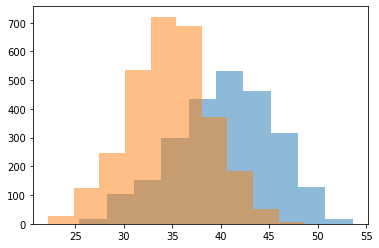

In [ ]:
# 
# H0: the ratio between adults (18>)that sleep less than 7hrs and the ratio
# between the ratio between adults(18>)than sleep more than 7hrs between STATE1
# and STATE2 is comparable.

# HA: the ratio between adults (18>)that sleep less than 7hrs and the ratio
# between the ratio between adults(18>)than sleep more than 7hrs between STATE1
# and STATE2 is significanly diferent.
#

plt.hist(stateny_dt['sleep_crudeprev'], alpha = .5)
plt.hist(statetx_dt['sleep_crudeprev'], alpha = .5)
stats.shapiro(stateny_dt['sleep_crudeprev'])
stats.shapiro(statetx_dt['sleep_crudeprev'])
sleepstastny = (stateny_dt['sleep_crudeprev'])
sleepstasttx = (statetx_dt['sleep_crudeprev'])
print(stats.describe(sleepstastny))
print(stats.describe(sleepstasttx))

# Visually they look pretty bell shape. perhaps a bit asymetric.
# Both samples one from State of NY
# and the other State of Texas

In [ ]:
# 1) for the group stateny_dt, state of NY:
# Distance of Asimetry = -0.26070718199153636
# K =-0.3999815385581984

# 2) for the group statetx_dt, state of TX:
# Distance of Asimetry = -0.011046940892108904
# K = -0.0711494330022715
#
""" the distance of asymetry is between -3 and 3 and 
K = Close to 0 and  negative."""

# since the values of Skewness are beteween -3 and 3 I would say is 
# OK to Run the T -test to answer the Following:



In [ ]:
stats.ttest_ind(stateny_dt.dropna()['sleep_crudeprev'], statetx_dt.dropna()['sleep_crudeprev'], nan_policy='omit')

Ttest_indResult(statistic=45.21862160454915, pvalue=0.0)

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore
we can say that both samples, the one from NY state and TX are compareblebetween them.

The sleep habits of Sample 1 (State of NY) and Sample 2 (State of TX) are statisticly comparative, including the ratio between sleepers less than 7 and
sleepers more than 7




In [ ]:
## with most certainty we can express than:
""" On average, the population of the state of NY
does have similar sleep habits than the population of the State
of Texas given the samples analysed """ 

